<h3>Preamble</h3>

<code>!</code>Merk op dat, voor het correct laten werken van de interactieve plots, de cells opnieuw gerund dienen te worden. Restart kernal and run all cells is hiervoor aan te raden.

In [2]:
import numpy as np
import scipy as sp
import xarray as xr
import json
import matplotlib.pyplot as plt
import cartopy

%matplotlib ipympl 
# for interactive plots
import pandas as pd 
# for removing NaNs from data
import pyproj 
# for projecting lat/long to x/y (cartopy may have an API for this but I already know pyproj)

Download dan van Blackboard de file `SODrifters.json`, zet die in dezelfde directory, map of folder als je notebook en laad de data met de code hieronder

Voor wat meer context over de paden kan het handig zijn ook de continenten te plotten. Hiervoor gebruiken we het `cartopy` package, bijvoorbeeld met de code hieronder. 

*Let op dat het, afhankelijk van de versie van je cartopy module, kan zijn dat je een aantal `warnings` ziet. Dat is niet erg, die waarschuwingen kun je negeren.*

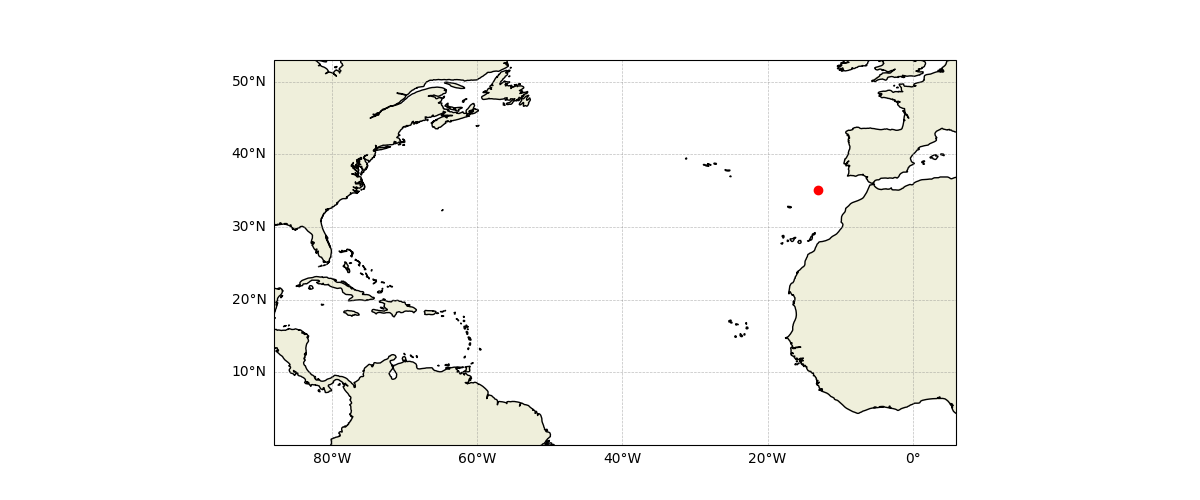

In [13]:
# We gebruiken hieronder de PlateCarree projectie;
# op de Cartopy website kun je ook andere projecties vinden
# als je daar meet wilt spelen
projection = cartopy.crs.PlateCarree

# initialisatie van de figuur
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=projection(central_longitude=-13))

# plot de kustlijnen en maak het land beige
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.LAND)

# zoom out om meer land te zien
ax.set_extent((-88,6,0,53), crs=projection())
plt.plot(-13.0525,35.095139,'o', color='red', transform=projection())

# de code hieronder plot lichtgrijze lijnen voor het longitude/latitude grid
# en zorgt voor goede formatting van de labels
gl = ax.gridlines(crs=projection(), draw_labels=True, linewidth=0.5,
                  color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER



plt.show()

<h3>Opgave 1: Taylor-Proudman stroming? [10 punten]</h3>

In deze eerste opgave ga je (kwalitatief) analyseren in hoeverre de drifters de bathymetry volgen. Dit kun je dan relateren aan het Taylor-Proudman theorema.

Op blackboard staat ook een file `bathymetry.nc`. Deze kun je inladen met de code hieronder, waarbij je het heel handige `xarray` package gebruikt. `xarray` is in klimaatfysica een veelgebruikte package, omdat het netCDF files heel makkelijk inleest, bewerkt en plot.


In [5]:
ds_bathy = xr.open_dataset('bathymetry.nc')

Je kunt bijvoorbeeld de diepte van de oceaan plotten met `ds_bathy.deptho.plot()`. Daar bovenop kun je dan de drifters plotten, met bijvoorbeeld de code van hierboven. 

<h4>Opgave 1.1</h4> [5 punten]: Doe dit in de cell hieronder, en zorg ervoor dat je duidelijk kunt zien wat de relatie tussen de drifters en de bathymetrie is.

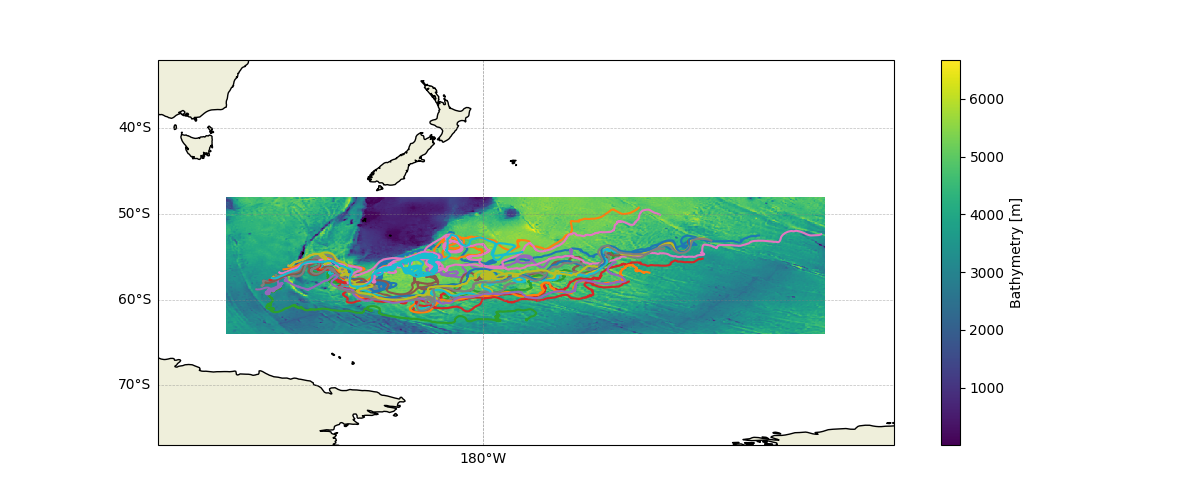

In [6]:
# initialisatie van de figuur
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=projection(central_longitude=180))

ds_bathy.deptho.plot.pcolormesh(ax=ax, transform=projection())

# plot de kustlijnen en maak het land beige
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.LAND)

# plot de trajecten, let op dat we een transformatie moeten gebruiken
for drifter in drifters:
    plt.plot(drifter['lon'], drifter['lat'], transform=projection())

# zoom out om meer land te zien
ax.set_extent((142,228,-77,-32), crs=projection())

# de code hieronder plot lichtgrijze lijnen voor het longitude/latitude grid
# en zorgt voor goede formatting van de labels
gl = ax.gridlines(crs=projection(), draw_labels=True, linewidth=0.5,
                  color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
plt.show()